In [1]:
#Author: Shreyas Shashikant Vaishnav
#Purpose: Hypothesis Testing

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

In [2]:
# Question 1
dataset = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Hypothesis Testing\Cutlets.csv")
dataset.head(5)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


<AxesSubplot:>

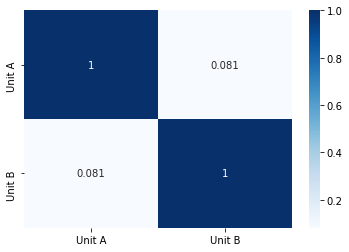

In [4]:
C = dataset.corr()
import seaborn as sns
sns.heatmap(C, annot= True, cmap="Blues")

In [4]:
Unit_A = pd.Series(dataset.iloc[:,0])
Unit_A.head(5)

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [5]:
Unit_B=pd.Series(dataset.iloc[:,1])
Unit_B.head(5)

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [6]:
stats.ttest_ind(Unit_A, Unit_B)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [7]:
t_test, p_value = stats.ttest_ind(Unit_A, Unit_B)
print(p_value)
if (p_value > 0.005):
    print("It accepts NULL Hypothesis.")
else:
    print("It accepts Alternate Hypothesis")

0.4722394724599501
It accepts NULL Hypothesis.


In [8]:
#p_value=0.4722 > 0.005, Therfore it accept Null Hypothesis (There is no difference in between two diameters of cutlets)

In [17]:
# Question 2
lab_dataset = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Hypothesis Testing\LabTAT.csv")
lab_dataset.head(5)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


<AxesSubplot:>

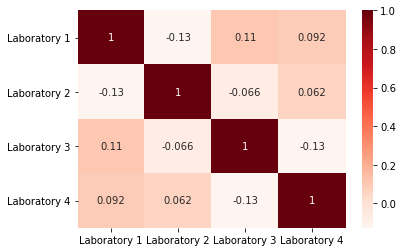

In [18]:
C1 = lab_dataset.corr()
sns.heatmap(C1, annot= True, cmap="Reds")

In [10]:
lab_dataset.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [11]:
oneway = stats.f_oneway(lab_dataset.iloc[:,0], lab_dataset.iloc[:,1], lab_dataset.iloc[:,2], lab_dataset.iloc[:,3])
print(oneway)

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)


In [15]:
# Question 3
BR_dataset=pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Hypothesis Testing\BuyerRatio.csv")
BR_dataset

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


<AxesSubplot:>

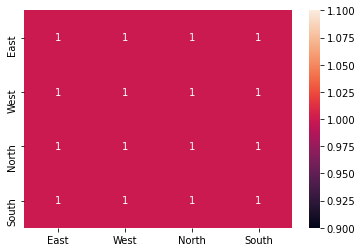

In [16]:
C2 = BR_dataset.corr()

sns.heatmap(C2, annot= True)

In [13]:
objList = BR_dataset.select_dtypes(include = "object").columns
print(objList)

Index(['Observed Values'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:       
    BR_dataset[feat]=le.fit_transform(BR_dataset[feat].astype(str))
print(BR_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Observed Values  2 non-null      int32
 1   East             2 non-null      int64
 2   West             2 non-null      int64
 3   North            2 non-null      int64
 4   South            2 non-null      int64
dtypes: int32(1), int64(4)
memory usage: 200.0 bytes
None


In [15]:
print(BR_dataset)

   Observed Values  East  West  North  South
0                1    50   142    131     70
1                0   435  1523   1356    750


In [16]:
oneway1 = stats.f_oneway(BR_dataset.iloc[:,0],BR_dataset.iloc[:,1],BR_dataset.iloc[:,2],BR_dataset.iloc[:,3],BR_dataset.iloc[:,4])
print(oneway1)

F_onewayResult(statistic=0.5960896991149738, pvalue=0.6818002355762813)


In [17]:
BR_INT = BR_dataset.iloc[:,1:]
print(BR_INT)

   East  West  North  South
0    50   142    131     70
1   435  1523   1356    750


In [18]:
chi_square_tscore, pval, df, exp_table = stats.chi2_contingency(BR_INT)
print('Chi-square score is {}.\nP-Value is {}.\nDF is {}.\nExpected table is \n{}'.format(chi_square_tscore,pval,df,exp_table))

Chi-square score is 1.595945538661058.
P-Value is 0.6603094907091882.
DF is 3.
Expected table is 
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [20]:
# Question 4
order = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Hypothesis Testing\Costomer+OrderForm.csv")
order.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for feat in order.columns:
    order.loc[:,feat]=le.fit_transform(order.loc[:,feat])

order.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


<AxesSubplot:>

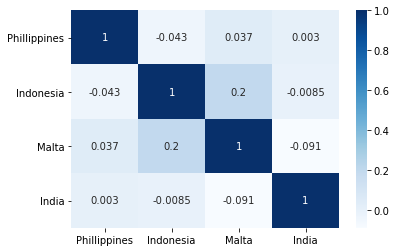

In [25]:
C3 = order.corr()
import seaborn as sns
sns.heatmap(C3, annot= True, cmap="Blues")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


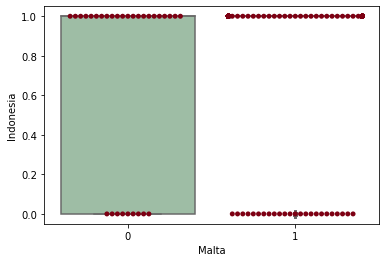

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Malta', y='Indonesia', data=order, color='#99c2a2')
ax = sns.swarmplot(x="Malta", y="Indonesia", data=order, color='#7d0013')
plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Indonesia ~ Malta', data=order).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Malta,1.124167,1.0,11.860221,0.000656
Residual,28.245833,298.0,NaN,NaN


In [29]:
model = ols('Phillippines ~ India', data=order).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
India,0.000238,1.0,0.002708,0.958529
Residual,26.196429,298.0,NaN,NaN


In [ ]:
oneway2 = stats.f_oneway(order.iloc[:,0], order.iloc[:,1], order.iloc[:,2], order.iloc[:,3])
print(oneway2)

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)


In [ ]:
chi_square_tscore,pval,df,exp_table = stats.chi2_contingency(order)
print('Chi-square score is {}.\nP-Value is {}.\nDf is {}.\nExpected table is \n{}'.format(chi_square_tscore,pval,df,exp_table))

Chi-square score is 112.74730231885849.
P-Value is 1.0.
Df is 897.
Expected table is 
[[0.74793008 0.73689052 0.7424103  0.77276909]
 [0.74793008 0.73689052 0.7424103  0.77276909]
 [0.49862006 0.49126035 0.4949402  0.51517939]
 ...
 [0.74793008 0.73689052 0.7424103  0.77276909]
 [0.99724011 0.9825207  0.9898804  1.03035879]
 [0.49862006 0.49126035 0.4949402  0.51517939]]
